In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [4]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
print(y_train)

[6 9 9 ... 9 1 1]


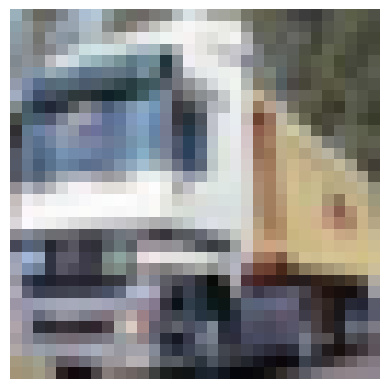

In [10]:
plt.imshow(x_train[1])
plt.axis('off')
plt.show()

In [14]:
y_train[1]

9

In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
cifar10_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

In [16]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import models,layers

In [17]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
ann.fit(x_train, y_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 163s 104ms/step - loss: 1.8092 - accuracy: 0.3564
Epoch 2/2
1563/1563 [==============================] - 148s 95ms/step - loss: 1.6246 - accuracy: 0.4249


In [22]:
pre=ann.predict(x_test)
pred=np.argmax(pre,axis=1)
print(pred)

313/313 [==============================] - 11s 36ms/step
[3 8 8 ... 3 6 4]


In [28]:
prediction=[cifar10_classes[i] for i in pred]

In [29]:
prediction

['cat',
 'ship',
 'ship',
 'ship',
 'deer',
 'frog',
 'cat',
 'frog',
 'deer',
 'ship',
 'ship',
 'truck',
 'frog',
 'horse',
 'automobile',
 'ship',
 'dog',
 'deer',
 'ship',
 'frog',
 'deer',
 'bird',
 'airplane',
 'truck',
 'deer',
 'frog',
 'frog',
 'airplane',
 'automobile',
 'frog',
 'frog',
 'deer',
 'deer',
 'frog',
 'ship',
 'automobile',
 'frog',
 'ship',
 'ship',
 'dog',
 'airplane',
 'frog',
 'cat',
 'frog',
 'airplane',
 'ship',
 'cat',
 'ship',
 'deer',
 'frog',
 'ship',
 'ship',
 'frog',
 'cat',
 'ship',
 'ship',
 'dog',
 'automobile',
 'ship',
 'bird',
 'deer',
 'cat',
 'automobile',
 'automobile',
 'frog',
 'bird',
 'automobile',
 'airplane',
 'dog',
 'truck',
 'deer',
 'frog',
 'ship',
 'ship',
 'ship',
 'bird',
 'truck',
 'dog',
 'cat',
 'ship',
 'ship',
 'automobile',
 'bird',
 'bird',
 'bird',
 'airplane',
 'ship',
 'ship',
 'ship',
 'ship',
 'ship',
 'deer',
 'ship',
 'bird',
 'deer',
 'frog',
 'frog',
 'airplane',
 'bird',
 'horse',
 'deer',
 'deer',
 'frog',
 'c

In [30]:
x_train.shape

(50000, 32, 32, 3)

In [31]:
x_test.shape

(10000, 32, 32, 3)

In [32]:
len(prediction)

10000

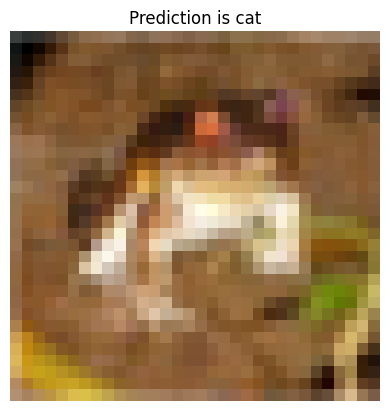

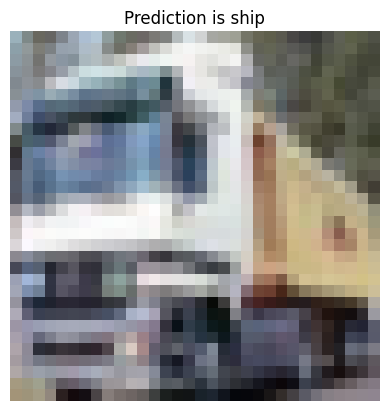

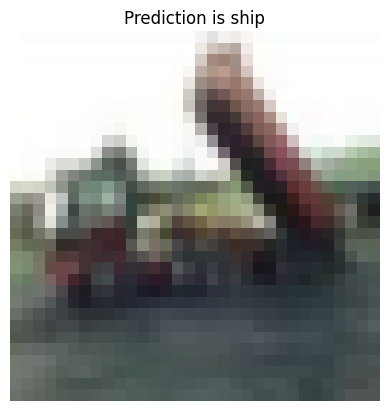

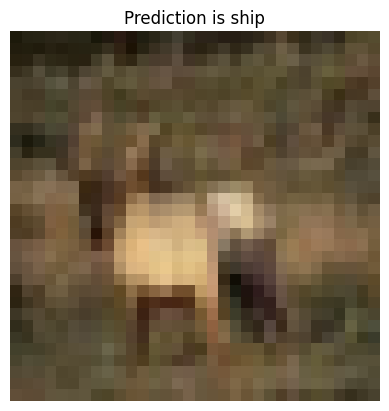

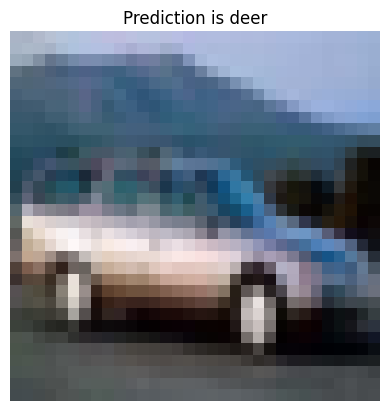

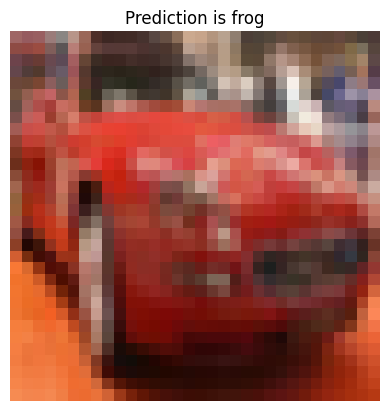

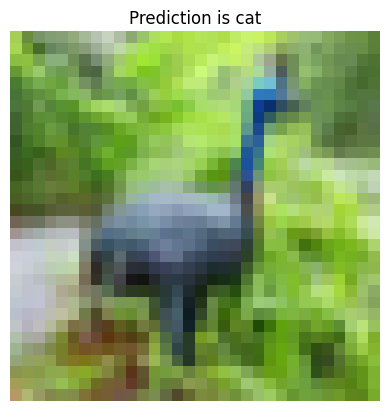

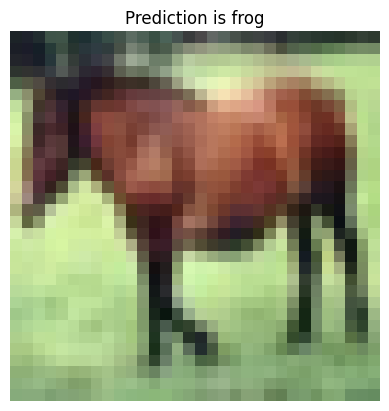

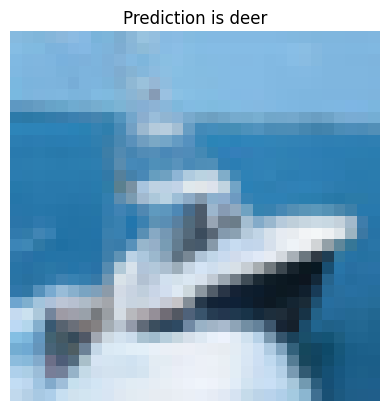

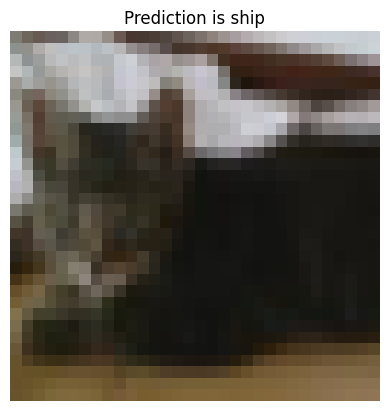

In [34]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f"Prediction is {prediction[i]}")
  plt.show()

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.4095

In [36]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3),activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [37]:
cnn.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]
)

In [38]:
cnn.fit(x_train,y_train,epochs=2)

Epoch 1/2
1563/1563 [==============================] - 71s 44ms/step - loss: 1.4265 - accuracy: 0.4897
Epoch 2/2
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0850 - accuracy: 0.6200


In [39]:
result=cnn.predict(x_test)
res=np.argmax(result,axis=1)
res

313/313 [==============================] - 9s 29ms/step


array([3, 8, 8, ..., 5, 1, 7])

In [40]:
prediction=[cifar10_classes[i] for i in pred]

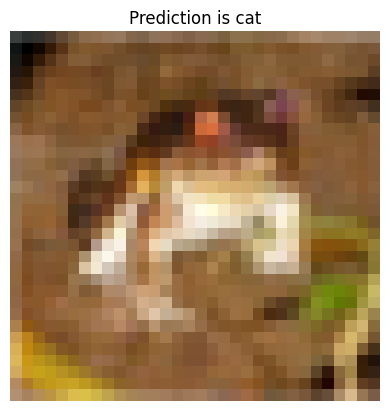

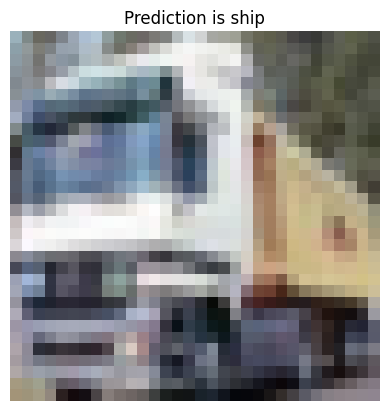

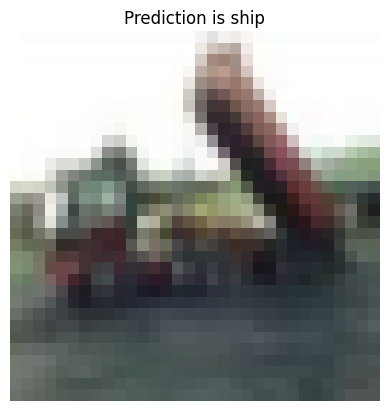

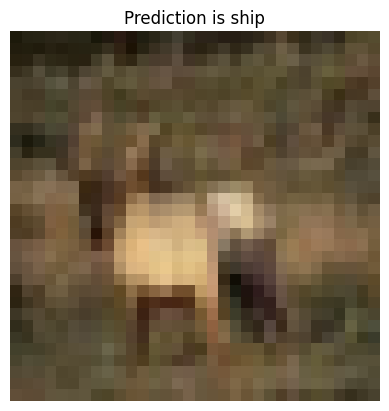

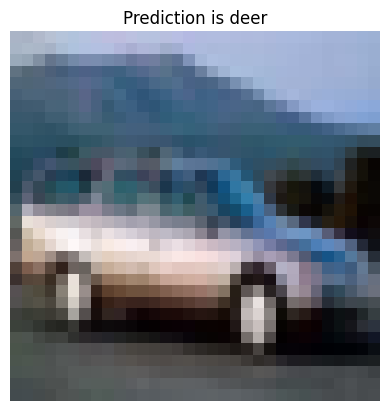

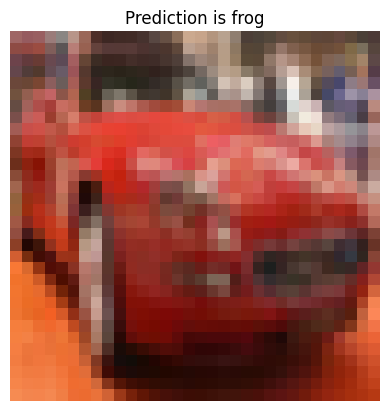

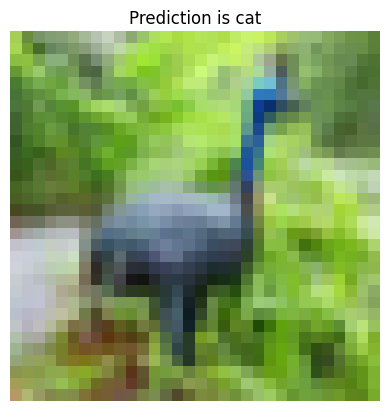

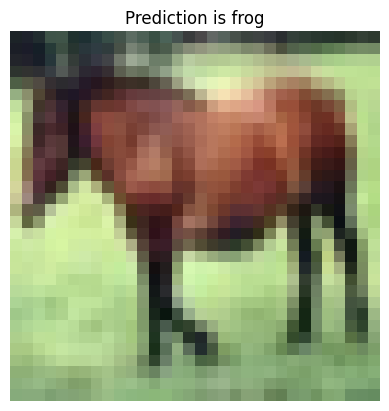

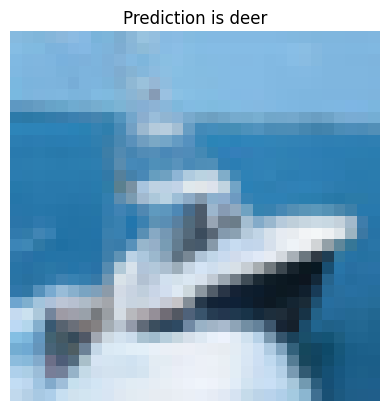

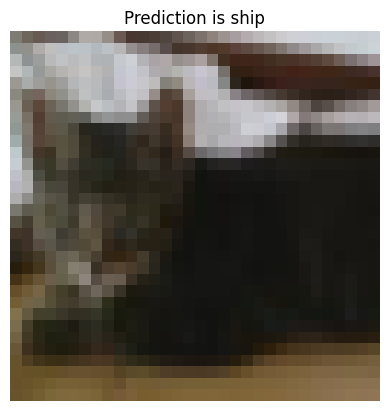

In [41]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f"Prediction is {prediction[i]}")
  plt.show()

In [42]:
print(accuracy_score(y_test,pred))

0.4095
